In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

import statsmodels.api as sm
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

In [38]:
# load data
data = pd.read_csv('joined_for_dtm.csv').drop('Unnamed: 0', axis=1)[['term', 'course', 'pdf_content']]

In [131]:
len(data)

2601

In [39]:
data.head()

,term,course,pdf_content
0,2010a,ACCT-101-401,ACCOUNTING 101 SPRING 2010 - REIS \r\n\r\nUniv...
1,2010a,ACCT-101-402,ACCOUNTING 101 SPRING 2010 - REIS \r\n\r\nUniv...
2,2010a,ACCT-101-403,ACCOUNTING 101 SPRING 2010 - REIS \r\n\r\nUniv...
3,2010a,ACCT-101-410,ACCOUNTING 101 SPRING 2010 - REIS \r\n\r\nUniv...
4,2010a,ACCT-101-411,ACCOUNTING 101 SPRING 2010 - REIS \r\n\r\nUniv...


In [144]:
# function to clean syllabus text
def clean_syllabus(syllabus):
    special_char = '/-*.x–:'
    
    # get rid of \n, \r and make lowercase
    sentences = sent_tokenize(syllabus.replace("\n", '').replace("\r", '').lower())
    
    # get rid of special characters and numbers
    cleaned = ''.join([''.join(i for i in sentence.strip() if not i.isdigit() and i not in special_char) 
                       for sentence in sentences])
    
    # return cleaned text as 1 string
    return ' '.join(word_tokenize(cleaned))

In [145]:
# get sentiment of syllabis
sentiment = np.array([])
sid = SentimentIntensityAnalyzer()
length = len(data)

for syllabus in data['pdf_content']:
    ss = sid.polarity_scores(clean_syllabus(syllabus))
    sentiment = np.append(sentiment, ss.get('pos') - ss.get('neg'))

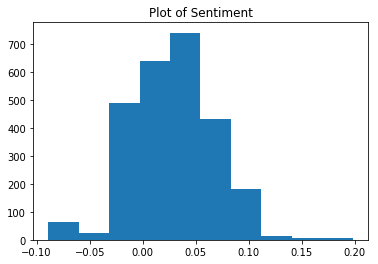

In [153]:
plt.hist(sentiment)
plt.title('Plot of Sentiment')
plt.show()

In [152]:
# nicest-sounding syllabus
data.iloc[2009]

term                                                       2016c
course                                              MKTG-234-003
pdf_content    \t\r\n\r\nThe\tWharton\tSchool\t\r\n\r\nUniver...
Name: 2009, dtype: object

In [189]:
# join to create final df
sentiment_df = pd.concat([data, pd.DataFrame(sentiment).rename(columns={0:'sentiment'})], axis=1).drop('pdf_content', axis=1)
sentiment_df['department'] = vect_strings(sentiment_df['course'], 4)

In [190]:
sentiment_df.head()

,term,course,sentiment,department
0,2010a,ACCT-101-401,-0.007,ACCT
1,2010a,ACCT-101-402,-0.007,ACCT
2,2010a,ACCT-101-403,-0.007,ACCT
3,2010a,ACCT-101-410,-0.007,ACCT
4,2010a,ACCT-101-411,-0.007,ACCT


In [198]:
# which departments had negative/positive sentiment on avg
sentiment_df.groupby('department').mean().sort_values(by='sentiment')

,sentiment
department,
ACCT,-0.015725
BEPP,-0.015709
STAT,0.013453
REAL,0.017226
FNCE,0.026535
OIDD,0.036195
MKTG,0.042947
LGST,0.044495
MGMT,0.062347


In [201]:
sentiment_df['sentiment'] = [1 if i>=0 else 0 for i in sentiment_df['sentiment']]

In [203]:
# sentiment_df.to_csv('sentiment.csv', index=False)